<a href="https://colab.research.google.com/github/lopez21j/Data-Analytics-Projects-/blob/main/CapstoneProject_GL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How does diabetes and other indicators impact rates of readmission within hospitals?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv")

## Analyzing the Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [6]:
data['encounter_id'].is_unique ## checking if the column 'ecounter_id' is unique 

True

## Quick Stats. 
The total number of patients is 101,766. The average time in the hospital is 4.4 days. The max number of days for time spent in the hospital is 14 days.


In [41]:
data.describe() ## from this we get could get a couple of statistics 



,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,30readmit
count,1.001140e+05,1.001140e+05,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000,100114.000000
mean,1.653032e+08,5.430611e+07,2.028597,3.594622,5.738388,4.389646,42.943305,1.330723,15.981821,0.369429,0.198334,0.632829,7.409164,0.468486
std,1.027194e+08,3.871493e+07,1.446225,5.237490,4.066412,2.974531,19.620940,1.700286,8.092511,1.264006,0.935537,1.261833,1.938288,0.499008
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.493462e+07,2.339867e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,1.524511e+08,4.548078e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,2.305332e+08,8.755836e+07,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000


count     100114
unique         4
top         None
freq       83238
Name: A1Cresult, dtype: object

In [8]:
data.count() ## originally there were 101,766 patients in the data set 

encounter_id                101766
patient_nbr                 101766
race                        101766
gender                      101766
age                         101766
weight                      101766
admission_type_id           101766
discharge_disposition_id    101766
admission_source_id         101766
time_in_hospital            101766
payer_code                  101766
medical_specialty           101766
num_lab_procedures          101766
num_procedures              101766
num_medications             101766
number_outpatient           101766
number_emergency            101766
number_inpatient            101766
diag_1                      101766
diag_2                      101766
diag_3                      101766
number_diagnoses            101766
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride         

In [9]:
data=data.replace('?','Unknown') ## in the 'race' column I noticed that there were ? values. I decided to replace all the ? with the word "unknown"

## Data Cleaning 

Meaning of the discharged codes from the 'discharge_disposition_id' column:
*  11=expired
*  19= expired at home
*  20= expired in a medical facility
*  21= expired, placed unknown
---
I will be removing from this data set all the patients that died (expired).

In [10]:
data = data[((data.discharge_disposition_id != 11) & 
                                          (data.discharge_disposition_id != 19) & 
                                           (data.discharge_disposition_id != 20) & 
                                          (data.discharge_disposition_id != 21))]  

In [11]:
data.groupby(['discharge_disposition_id'])['encounter_id'].count() ## veryfing that the codes were removed 
     

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
22     1993
23      412
24       48
25      989
27        5
28      139
Name: encounter_id, dtype: int64

In [12]:
data['30readmit'] = np.where(data['readmitted'] == 'NO', 0, 1)
 ## The readmitted column has three values 'NO','<30','>30' so I creatd a new column named "30readmit" and turn it into binary answer Yes or NO. 
 ## NO= 0 anything else whether it was readmitted in less than 30 days or more = 1

In [13]:
subset=data[['encounter_id','gender', 'age', 'time_in_hospital', 'race','A1Cresult','readmitted','discharge_disposition_id','30readmit']]
## creating a subset of the columns that I will utilize for my analysis 

In [14]:
subset.count() ## The data set now has 100,114 patients after removing those that expired 

encounter_id                100114
gender                      100114
age                         100114
time_in_hospital            100114
race                        100114
A1Cresult                   100114
readmitted                  100114
discharge_disposition_id    100114
30readmit                   100114
dtype: int64

## AC1 results and its relation with hospital readmission rates

A normal A1C level is below 5.7%, a level of 5.7% to 6.4% indicates prediabetes and a level of 6.5% or more indicates diabetes. The higher your A1C, the greater your risk is for developing type 2 diabetes. I was interested in seeing the readmission rates of those patients which A1C levels were high (>7% and >8%).

In [44]:
subset['A1Cresult'].value_counts() ## Out of the 100,114 patients, 16,876 patients had their AC1 levels tested 


None    83238
>8       8151
Norm     4941
>7       3784
Name: A1Cresult, dtype: int64

In [16]:
A1C_patients = subset.loc[(subset['A1Cresult'] == '>8') | (subset['A1Cresult'] == '>7')| (subset['A1Cresult'] == 'Norm') ]
## from the subset Data I filtered only the patients whose A1C result were >7, >8 or Normal

In [17]:
A1C_patients['encounter_id'].count()

16876

In [18]:
A1C_patients['A1Cresult'].value_counts()

>8      8151
Norm    4941
>7      3784
Name: A1Cresult, dtype: int64

In [19]:
A1C_patients['readmitted'].value_counts()

NO     9400
>30    5800
<30    1676
Name: readmitted, dtype: int64

In [20]:
A1C_patients['30readmit'].value_counts()

0    9400
1    7476
Name: 30readmit, dtype: int64

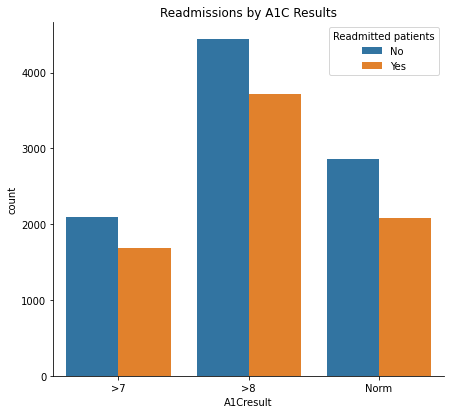

In [21]:
plot1 = sns.countplot(x = 'A1Cresult', hue = '30readmit', data = A1C_patients) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions by A1C Results')
plt.show()
## We can see that patients with an A1C higher than 8 had more readmissions compare to those with a normal or even those with an AC1 higher than 7.


## Analyzed the role that gender played in the readmission rate

In [22]:
subset ## For this analysis I decided to use the subset which includes all 100,114 patients except those that have expired

,encounter_id,gender,age,time_in_hospital,race,A1Cresult,readmitted,discharge_disposition_id,30readmit
0,2278392,Female,[0-10),1,Caucasian,None,NO,25,0
1,149190,Female,[10-20),3,Caucasian,None,>30,1,1
2,64410,Female,[20-30),2,AfricanAmerican,None,NO,1,0
3,500364,Male,[30-40),2,Caucasian,None,NO,1,0
4,16680,Male,[40-50),1,Caucasian,None,NO,1,0
...,...,...,...,...,...,...,...,...,...
101761,443847548,Male,[70-80),3,AfricanAmerican,>8,>30,3,1
101762,443847782,Female,[80-90),5,AfricanAmerican,None,NO,4,0
101763,443854148,Male,[70-80),1,Caucasian,None,NO,1,0
101764,443857166,Female,[80-90),10,Caucasian,None,NO,3,0


In [23]:
subset['gender'].value_counts() ## there are more female patients than male 

Female             53861
Male               46250
Unknown/Invalid        3
Name: gender, dtype: int64

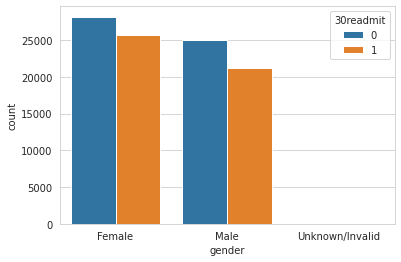

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='gender', hue='30readmit', data=subset)
## overall there were more female patients that were readmitted to the hospital than male patients
## Gender does not seem to play a big factor in whether a patient will get readmitted 

## Analyzed the role age plays in readmission rates 

In [25]:
subset['30readmit'].count()

100114

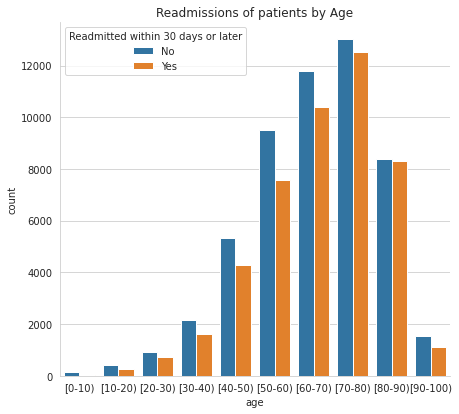

In [26]:
b = subset.age.unique()
b.sort()
b_sort = np.array(b).tolist()


ageplt = sns.countplot(x = 'age', hue = '30readmit', data = subset, order = b_sort) 

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days or later', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions of patients by Age')
plt.show()
## Out of the entire data of 100,114 the rate of readmission is about 46.85%. Almost half of the patients were readmitted whether it was within 30 days or longer. 
## We can conclude that age does play a factor in whether they will get readmitted. We can see that most of the readmissions were patients 60 years and older. 
## The age bracket who had the highest readmissions were 70-80 yrs old bracket.

In [27]:
subset['30readmit'].value_counts() ## NO= 0 Yes= 1

0    53212
1    46902
Name: 30readmit, dtype: int64

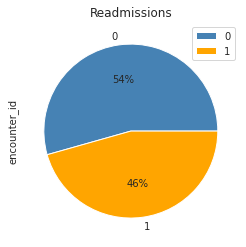

In [38]:
subset.groupby(['30readmit']).sum().plot(kind='pie', y='encounter_id', autopct='%1.0f%%',
                                colors = ['steelblue', 'orange'],
                                title='Readmissions')## NO= 0 Yes= 1

##What role does Race plays in hospital readmissions?


In [29]:
subset.head(20)


,encounter_id,gender,age,time_in_hospital,race,A1Cresult,readmitted,discharge_disposition_id,30readmit
0,2278392,Female,[0-10),1,Caucasian,None,NO,25,0
1,149190,Female,[10-20),3,Caucasian,None,>30,1,1
2,64410,Female,[20-30),2,AfricanAmerican,None,NO,1,0
3,500364,Male,[30-40),2,Caucasian,None,NO,1,0
4,16680,Male,[40-50),1,Caucasian,None,NO,1,0
5,35754,Male,[50-60),3,Caucasian,None,>30,1,1
6,55842,Male,[60-70),4,Caucasian,None,NO,1,0
7,63768,Male,[70-80),5,Caucasian,None,>30,1,1
8,12522,Female,[80-90),13,Caucasian,None,NO,1,0
9,15738,Female,[90-100),12,Caucasian,None,NO,3,0


In [50]:
subset.groupby(['race'])['encounter_id'].count().nlargest(6)## this gives us a count of the race of all patients 

race
Caucasian          74845
AfricanAmerican    18888
Unknown             2239
Hispanic            2024
Other               1486
Asian                632
Name: encounter_id, dtype: int64

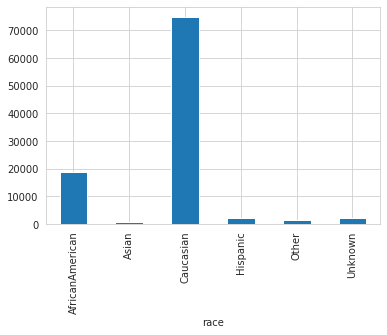

In [56]:
subset.groupby(['race'])['encounter_id'].count().plot(kind='bar') 
## From this graph and the pie chart we can observe that most patients were Caucausian followed by African Americans. From the data alone we can conclude that more Caucasians were hospitalized due to diabetes than any other race. 
## Of coure we are missing more relevant information.  76% of the patients were Caucasians followed by African Americans which made up 17% of the entire data.

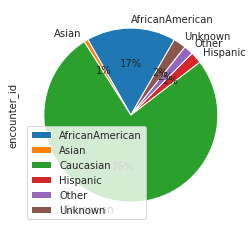

In [80]:
subset.groupby(['race']).sum().plot(
    kind='pie', y='encounter_id', autopct='%1.0f%%', startangle=60)

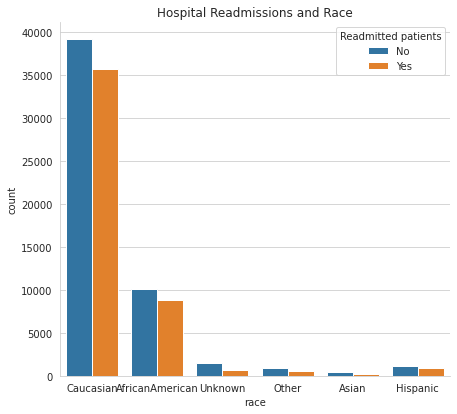

In [33]:
plot1 = sns.countplot(x = 'race', hue = '30readmit', data = subset) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Hospital Readmissions and Race')
plt.show()

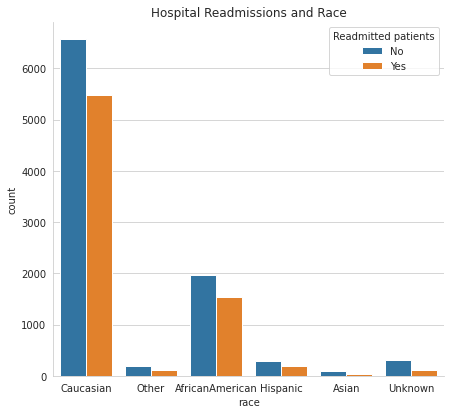

In [34]:
plot1 = sns.countplot(x = 'race', hue = '30readmit', data = A1C_patients) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Hospital Readmissions and Race')
plt.show()
## After examining the Data of patients whose A1C was tested to determine if Race had any relation to hospital readmissions, this small sample showed similar results as the entire Data set.

## Conclusion:

This data set drew my attention because many people I know suffer from Diabetes. I was interested to find out what other factors besides diabetes would determine whether you would be readmitted to the hospital. I was surprised to discover that the Race who was most affected by diabetes was Caucasians.  The Data does not specify where this Data was collected or whether this Data was a good representation of the entire country so it was difficult to make general conlusions. The data did clearly show that the older you were the higher your chances would be of returning to the hospital. It was also evident that having a high A1C and not having your sugar in control played a big role in whether you would be readmitted to the hospital.  This data was very interesting and provided many useful characteristics to analyze.